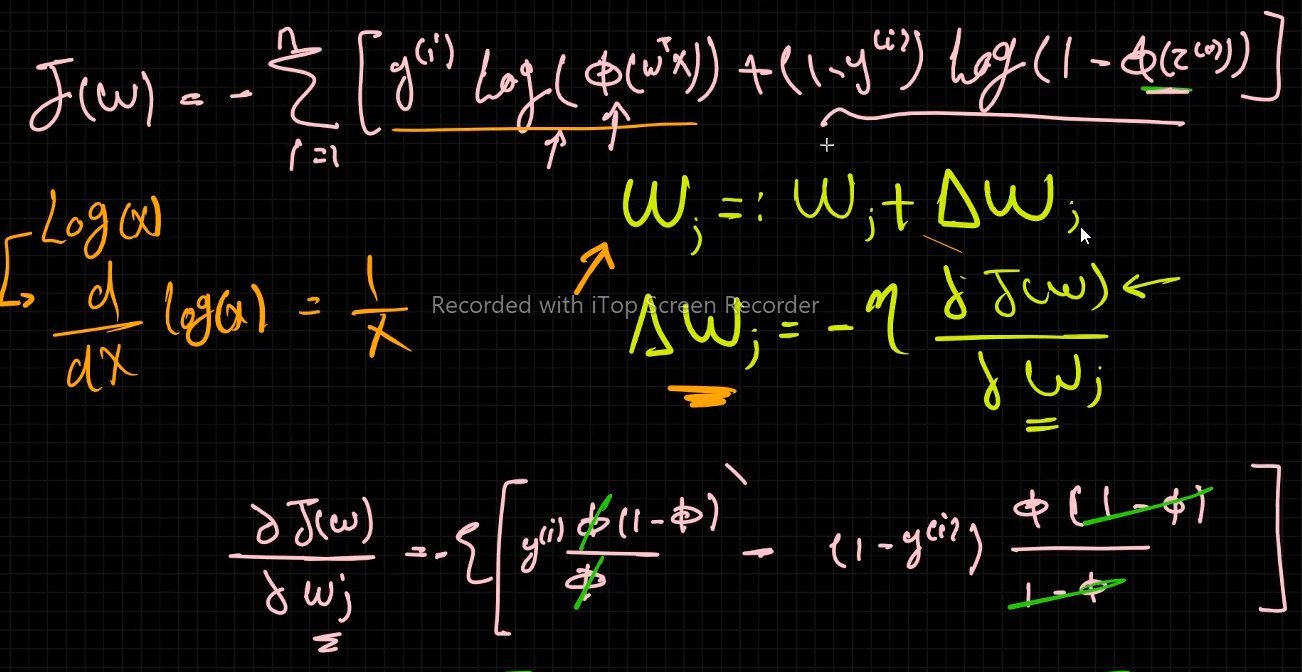

In [1]:
import numpy as np

In [8]:
class LogisticRegression(object):
  
    
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state=random_state
        
    def fit(self, X, y):
        
        rgen = np.random.RandomState(self.random_state)
        X=np.insert(X,0,1,axis=1) # axis=1 mean add ones to column 
        self.w_ = rgen.normal(loc=0.0, scale=0.01,size=X.shape[1])
        self.cost = [] 
        
        for i in range(self.n_iter):
            net_input=self.net_input(X)
            output=self.activation(net_input)
            errors=(y-output)
            update=self.eta * X.T.dot(errors) # gradient vector
            self.w_=self.w_+update
            cost= -y.dot(np.log(output)) - (1-y).dot(np.log(1-output))      # modified
            self.cost.append(cost)
        return self
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_)
    
    def activation(self, Z):
        #sigmoid activation function
        return 1/(1+np.exp(-Z))
    def predict(self,X):
        Z=self.net_input(X)
        output=self.activation(Z)
        return np.where(output>=0.5,1,0)
    

## Training a LogisticRegression model on the Iris dataset

In [9]:
import pandas as pd

In [10]:
df=pd.read_csv("iris.csv",header=None,encoding='utf-8')

In [11]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


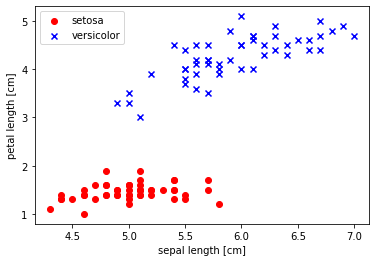

In [12]:
import matplotlib.pyplot as plt
import numpy as np
# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Setosa', -1, 1)
# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values
# plot data
plt.scatter(X[:50, 0], X[:50, 1],
    color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
    color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

C:\Users\YoUsef\AppData\Local\Temp\ipykernel_13292\3549660286.py:4: RuntimeWarning: invalid value encountered in log10
  ax[0].plot(range(1, len(Lr1.cost) + 1),np.log10(Lr1.cost), marker='o')


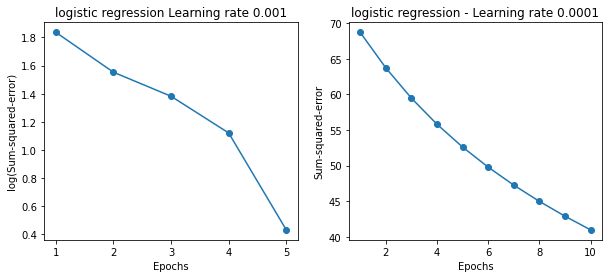

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

Lr1 = LogisticRegression(n_iter=10, eta=0.001).fit(X, y)
ax[0].plot(range(1, len(Lr1.cost) + 1),np.log10(Lr1.cost), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('logistic regression Learning rate 0.001')

lr2 = LogisticRegression(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(lr2.cost) + 1),lr2.cost, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('logistic regression - Learning rate 0.0001')
plt.show()